In [1]:
import joblib
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/Default Dataset Voltage to Capacity (Revisi 1).csv')

In [3]:
df['Voltage'] = df['Voltage'] * 16

In [4]:
df

,Capacity,Voltage
0,99.885288,55.374258
1,99.749525,55.116456
2,99.545789,54.794270
3,99.342099,54.439825
4,99.206381,54.149765
...,...,...
446,0.338026,1.695962
447,0.270465,1.341254
448,0.225592,0.986502
449,0.271700,0.470284


<Axes: xlabel='Voltage', ylabel='Capacity'>

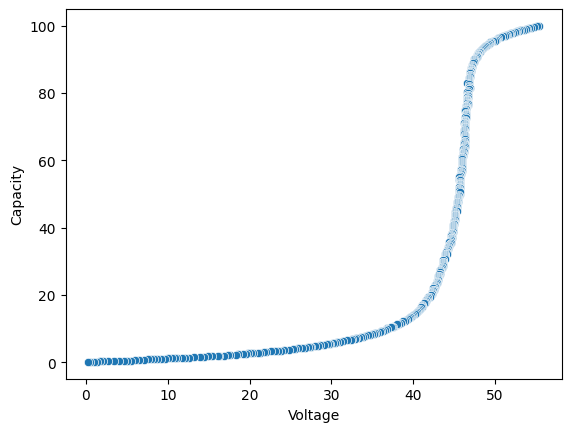

In [5]:
sns.scatterplot(x=df['Voltage'], y=df['Capacity'])

In [6]:
X = df[['Voltage']]
y = df['Capacity']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model_svr = SVR(kernel='poly', degree=4)

In [9]:
model_svr.fit(X_train, y_train)

SVR(degree=4, kernel='poly')

In [10]:
y_pred = model_svr.predict(X_test)

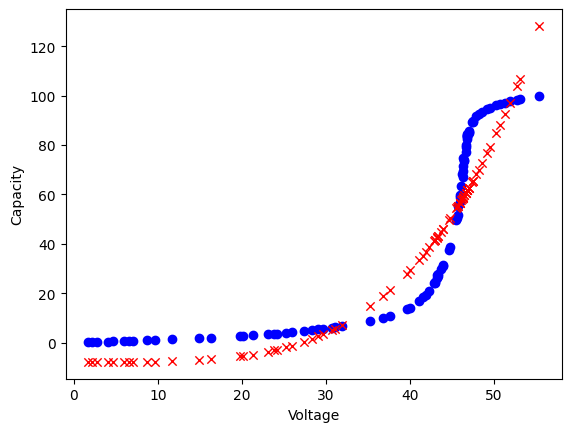

In [11]:
plt.scatter(X_test, y_test, color='blue')
plt.scatter(X_test, y_pred, color='red', marker='x', linewidths=1)
plt.xlabel('Voltage')
plt.ylabel('Capacity')
plt.show()

In [13]:
accuracy = model_svr.score(X_test, y_test)
print(f'Akurasi model: {accuracy}')

Akurasi model: 0.8557761372729238


In [15]:
pklname = 'voltage_to_capacity.pkl'

joblib.dump(model_svr, pklname)

['voltage_to_capacity.pkl']

In [16]:
new_data = pd.DataFrame({'Voltage': [50]})

model = joblib.load(pklname)

pred_capacity = model.predict(new_data)
print(pred_capacity[0])

82.59244499771121
